<a href="https://colab.research.google.com/github/Louis5228/Digital-Image-Process/blob/main/Image_restoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
from matplotlib import pyplot as plt
import numpy as np
import cv2
import math
drive.mount('/content/gdrive')
os.chdir("/content/gdrive/My Drive/Digital Image Process/HW3")

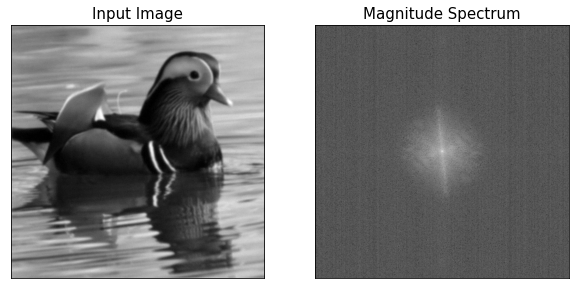

In [ ]:
# load image
img = cv2.imread('Bird 2 degraded.tif', 0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT) # Computed the 2-d discrete Fourier Transform
dft_shift = np.fft.fftshift(dft) # Shift the zero-frequency component to the center of the spectrum.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) # compute magnitude spectrum

plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title('Input Image', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum', fontsize = 15), plt.xticks([]), plt.yticks([])
plt.show()

Model parameter k = 0.001



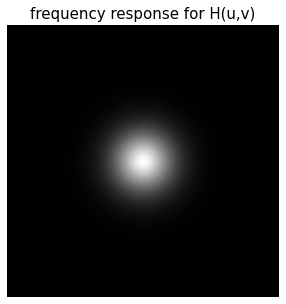

In [106]:
# Compute H(u,v)
k = 0.001             # Model parameter
img_h = img.shape[0]
img_w = img.shape[1]
H = np.zeros((img_h, img_w))
for i in range(img_h):
  for j in range(img_w):
    H[i,j] = math.exp(-k*math.pow((i-img_h/2)**2+(j-img_w/2)**2, 5/6))

print('Model parameter k = '+str(k)+'\n')
plt.figure(figsize=(8,5))
plt.imshow(H, cmap = 'gray')
plt.title('frequency response for H(u,v)', fontsize = 15)
plt.axis('off')
plt.show()

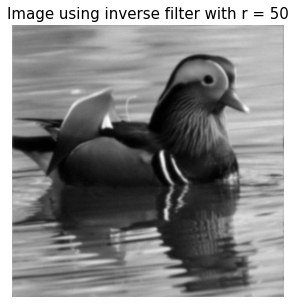

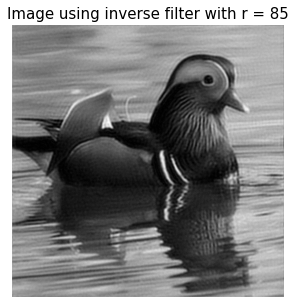

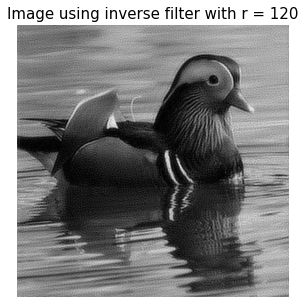

In [ ]:
# Compute inverse filter
H_inverse = np.zeros((img_h, img_w, 2), np.uint8)
radii = [50, 85, 120]
for N in range(len(radii)):
  for i in range(img_h):
    for j in range(img_w):
      r = math.sqrt((i-img_h/2)**2+(j-img_w/2)**2)
      if r > radii[N]:
        H_inverse[i,j] = 1.0
      else:
        H_inverse[i,j] = math.exp(k*math.pow((i-img_h/2)**2+(j-img_w/2)**2, 5/6))
  # Apply inverse Fourier Transform
  fshift = dft_shift * H_inverse
  f_ishift = np.fft.ifftshift(fshift)
  img_back = cv2.idft(f_ishift)
  img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

  plt.figure(figsize=(8,5))
  plt.imshow(img_back, cmap = 'gray')
  plt.title('Image using inverse filter with r = ' + str(radii[N]), fontsize = 15)
  plt.axis('off')
  plt.show()